# IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import missingno as msno
import dtale
import seaborn as sns
%matplotlib inline

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\distributed\utils.py:133: RuntimeWarning: Couldn't detect a suitable IP address for reaching '8.8.8.8', defaulting to '127.0.0.1': [WinError 10051] A socket operation was attempted to an unreachable network
  RuntimeWarning,
C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


# EAGLEBINE VIZUALIZATION

## EXPORTING EAGLEBINE DATA

In [2]:
df=pd.read_csv('eaglebine.csv')

df.drop(columns =['Unnamed: 0','Elevation_Reference', 'TD','diff_depth_abs'],inplace=True)
df.drop(df.columns[21], axis = 1, inplace = True)
df.drop(columns =[ 'SurfaceLatitude_NAD83','SurfaceLongitude_NAD83', 'BottomLatitude_NAD83', 'BottomLongitude_NAD83', 'SurfaceLatitude_NAD27',
       'SurfaceLongitude_NAD27', 'BottomLatitude_NAD27','BottomLongitude_NAD27'],inplace=True)

In [3]:
df.drop(['mud depth', 'mud_diff_depth', 'mud_diff_depth_abs','Bottom_Hole_Location_X',
       'Bottom_Hole_Location_Y', 'Elevation(f)', 'Latitude', 'Longitude',
       'Total_Depth(f)', 'X(f)', 'Y(f)', '01_Wilcox_MD_ft', '02_Midway_MD_ft',
       '03_Navarro_MD_ft', '04_Taylor_MD_ft', '05_Anacacho_MD_ft',
       '06_Austin_Chalk_MD_ft', '07_Upper_Eagle_Ford_MD_ft',
       '08_Lower_Eagle_Ford_MD_ft', '09_Woodbine_MD_ft', '10_Maness_MD_ft',
       '11_Buda_MD_ft', '12_Del_Rio_MD_ft', '13_Georgetown_MD_ft',
       '14_Edwards_MD_ft', '15_Glen_Rose_MD_ft', '16_Pearsal_MD_ft',
       '17_James_Cow_Creek_MD_ft', '18_Sligo_MD_ft', '19_Cotton_Valley_MD_ft'],axis=1,inplace=True)

### MERGING GRADIENT DATA WITHIN EAGLEBINE DATA

In [4]:
gradient=pd.read_excel('egb_avg_gradient.xlsx')
df = df.merge(gradient,how='left',on='UWI')

In [5]:
df['Temp_Gradient(C/m)'] =df['Gradient']*3.2808

In [6]:
df['Avg water cut (fraction)'] = df['Water Total Cum (bbl)   ']/df['Oil Total Cum (bbl)   ']

In [7]:
df['Total Liquid Cum(bbl)'] = df['Water Total Cum (bbl)   ']+df['Oil Total Cum (bbl)   ']


In [8]:
#df =df.rename({'Gradient': 'Temp_Gradient(C/m)'},axis=1)

## EXPLORATORY DATA ANALYSIS_EAGLEBINE

In [9]:
df_hist= df[['TD (ft)','BHT_below sea level (ft)','TempC_BHT', 'True_TempC_Final','Mud Wt','Production_interval(years)', 'Oil Total Cum (bbl)   ','Total Liquid Cum(bbl)',
       'Gas Total Cum (mcf)   ', 'Water Total Cum (bbl)   ','Total Vertical Depth (ft)   ','Temp_Gradient(C/m)']]

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axe

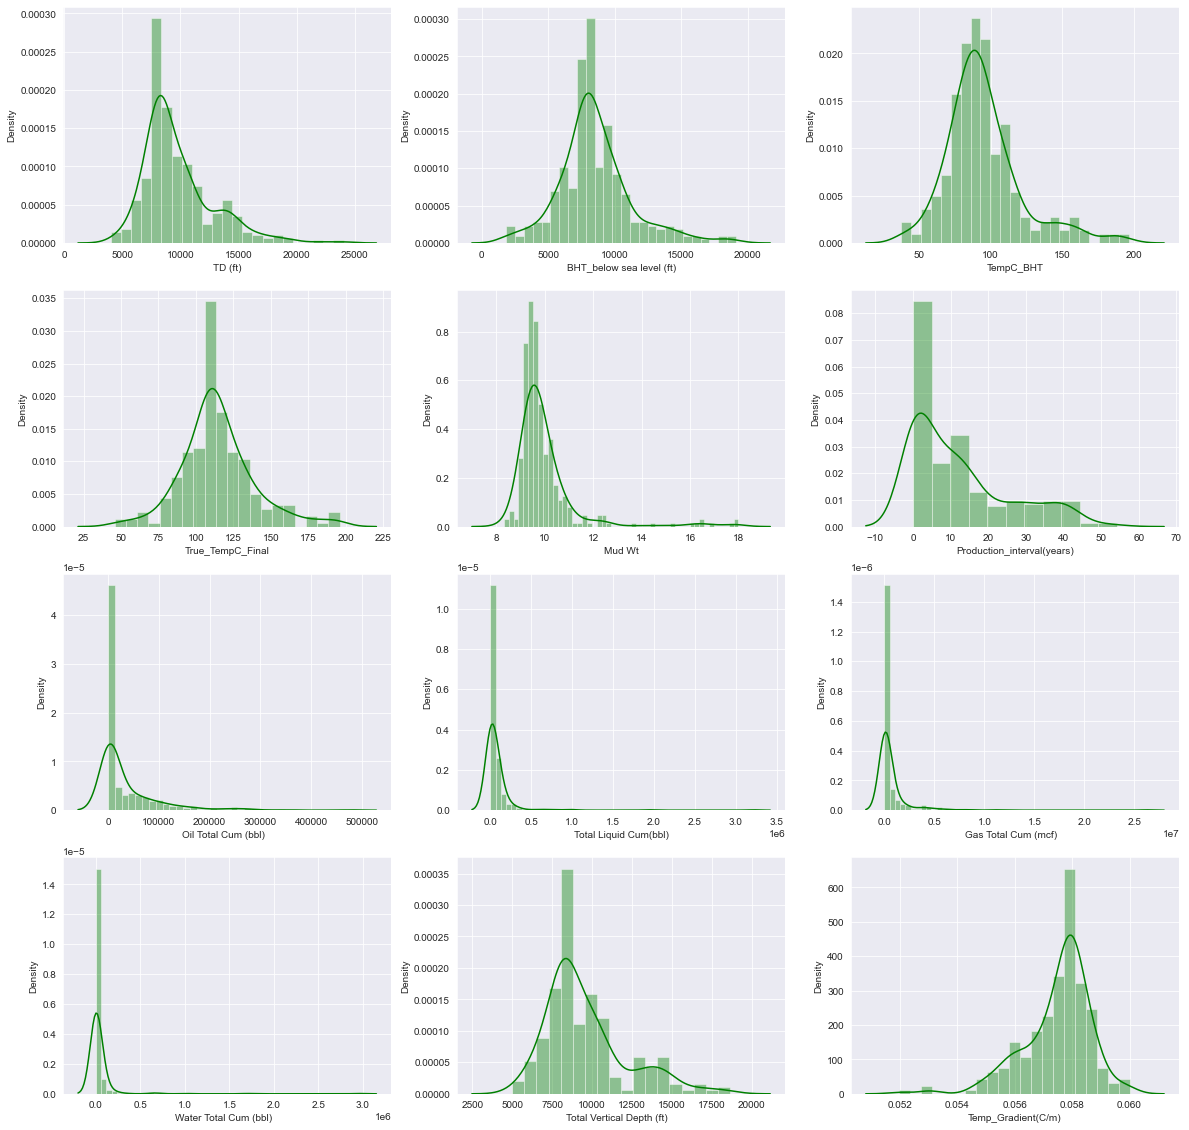

In [10]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(20, 20)

for ax, col in zip(axes, df_hist.columns):
  sns_plot=sns.distplot(df_hist[col], ax = ax, color='g')

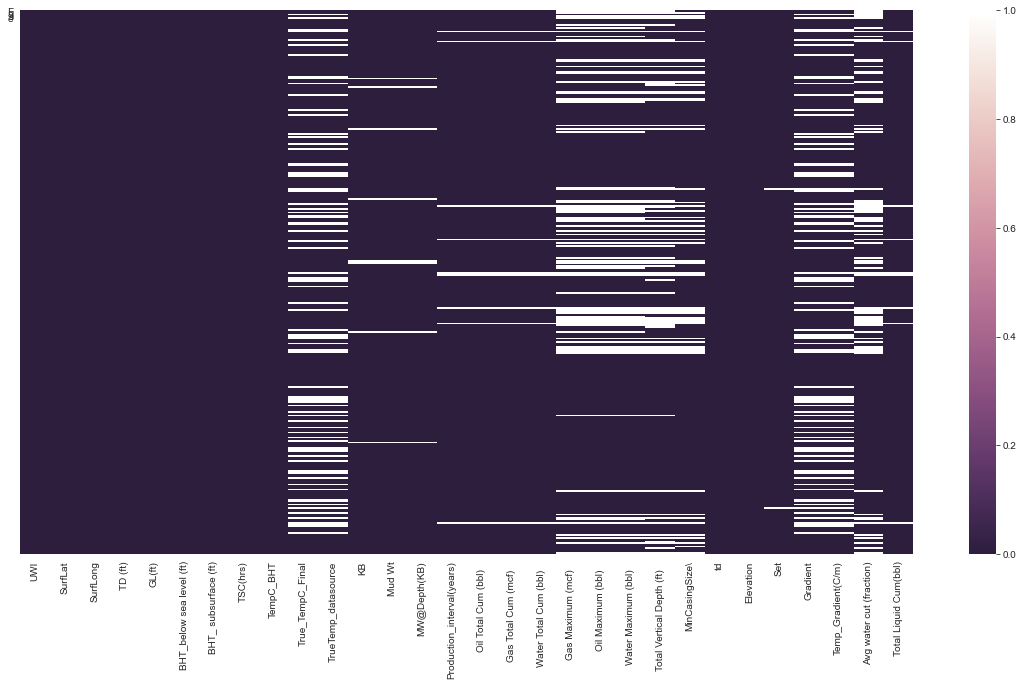

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 10))

# cubehelix palette is a part of seaborn that produces a colormap
cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
fig=sns.heatmap(df.isnull(), cmap=cmap, yticklabels='False')

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\U

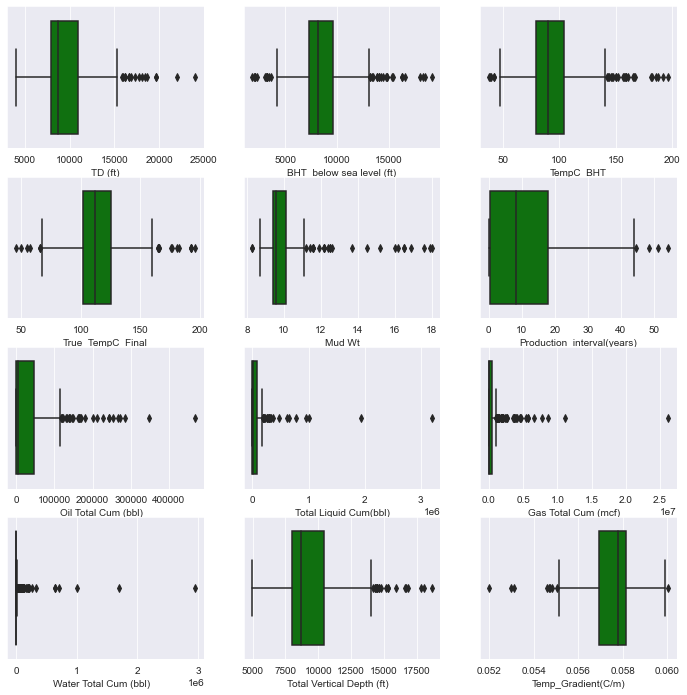

In [12]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 4, ncols = 3)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(12, 12)

for ax, col in zip(axes, df_hist.columns):
  sns.boxplot(df_hist[col], ax = ax, color='g')

<AxesSubplot:>

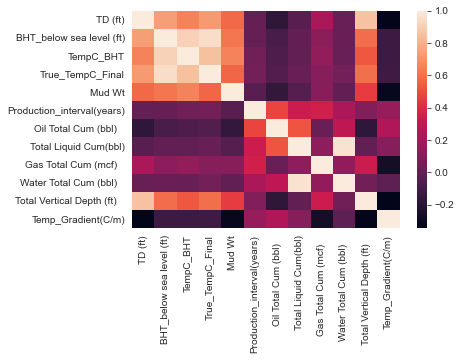

In [13]:
sns.set_style('darkgrid')
sns.heatmap(df_hist.corr())

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



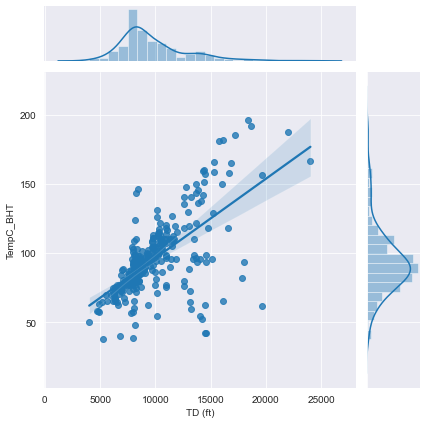

In [14]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="TD (ft)",                  
y="TempC_BHT",dropna='True')
g.plot(sns.regplot, sns.distplot)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



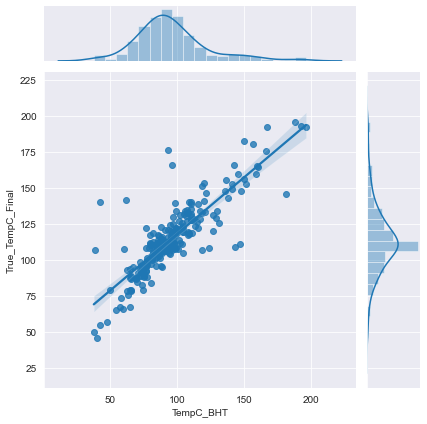

In [15]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="TempC_BHT",                  
y="True_TempC_Final",dropna='True')
g.plot(sns.regplot, sns.distplot)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



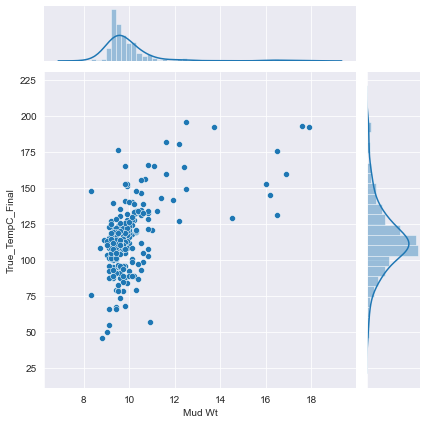

In [16]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="Mud Wt",                  
y="True_TempC_Final",dropna='True')
g.plot(sns.scatterplot, sns.distplot)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



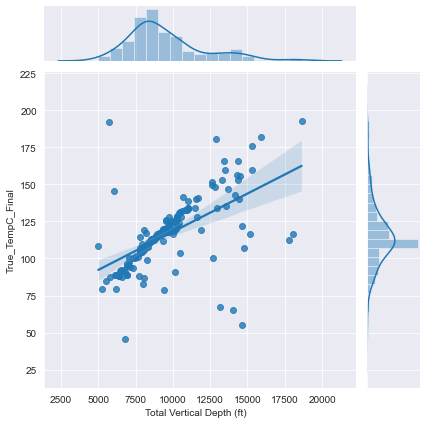

In [17]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=df, x="Total Vertical Depth (ft)   ",                  
y="True_TempC_Final",dropna='True')
g.plot(sns.regplot, sns.distplot)

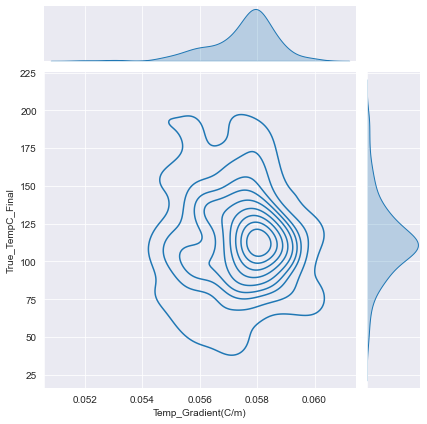

In [18]:
g = sns.JointGrid(data=df, x="Temp_Gradient(C/m)",
y="True_TempC_Final", dropna='True')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)

# DUVERNEY

In [19]:
dvnCombined = pd.read_csv('dvnCombined.csv')
dvnCombined = dvnCombined.drop(
    [col for col in dvnCombined.columns if '_FT' in col], axis=1)
dvnCombined = dvnCombined.drop(['Play_'], axis=1)
dvnCombined = dvnCombined.dropna(how='all', axis=1)
dropCols = dvnCombined.columns[(
    dvnCombined.isna().sum() / dvnCombined.shape[0]) > 0.5]
dvnCombined = dvnCombined.drop(dropCols, axis=1)
dropCols = dvnCombined.columns[dvnCombined.nunique() < 10]
dvnCombined = dvnCombined.drop(set(dropCols) - set(['Set_']), axis=1)
dropCols = [col for col in dvnCombined.columns if any(
    source in col for source in ['_Pres', 'NAD27'])] + ['Formation DSTd']
dvnCombined = dvnCombined.drop(dropCols, axis=1)
dvnCombined['Spud Date_Prod'] = (pd.to_datetime(
    dvnCombined['Spud Date_Prod']) - pd.to_datetime('today')).dt.days
dvnCombined['Elevation_Prod'] = dvnCombined['Elevation_Prod'].apply(
    lambda x: float(x.split()[0]))*0.3048

dvnCombined.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   UWI                               499 non-null    object 
 1   DST Start Depth (MD) (m)          499 non-null    float64
 2   DST End Depth (MD) (m)            499 non-null    float64
 3   DST Bottom Hole Temp. (degC)      499 non-null    float64
 4   DST Test Date                     499 non-null    int64  
 5   DST Number                        499 non-null    int64  
 6   elevation M above sea level       499 non-null    float64
 7   Depths subsea (m)                 499 non-null    float64
 8   Measured Depth (m)_Prod           499 non-null    float64
 9   Total Vertical Depth (m)_Prod     499 non-null    float64
 10  Spud Date_Prod                    499 non-null    int64  
 11  Elevation_Prod                    499 non-null    float64
 12  Elevatio

In [20]:
dvnCombined['well_age(years)'] = -(dvnCombined['Spud Date_Prod']/365)

In [21]:
dvn_grad= pd.read_excel('duverney_avg_gradient.xlsx')
dvnCombined = dvnCombined.merge(dvn_grad,how='left',on='UWI')

In [22]:
dvnCombined['Total Vertical Depth (ft)'] = dvnCombined['Total Vertical Depth (m)_Prod']*3.28084
dvnCombined['TD (ft)'] = dvnCombined['TD meters_WH']*3.28084
dvnCombined=dvnCombined.rename({'target': 'True_Temp(C)_Final'},axis=1)

In [23]:
dvnCombined= dvnCombined.rename({'Gradient': 'Temp_Gradient(C/m)'},axis=1)

In [24]:
dvn_hist=dvnCombined[['well_age(years)', 'Total Vertical Depth (ft)', 'TD (ft)','True_Temp(C)_Final','DST Bottom Hole Temp. (degC)','SurfaceLatitude_NAD83_WH', 'SurfaceLongitude_NAD83_WH','Temp_Gradient(C/m)']]

## EXPLORATORY DATA ANALYSIS_DUVERNEY

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axe

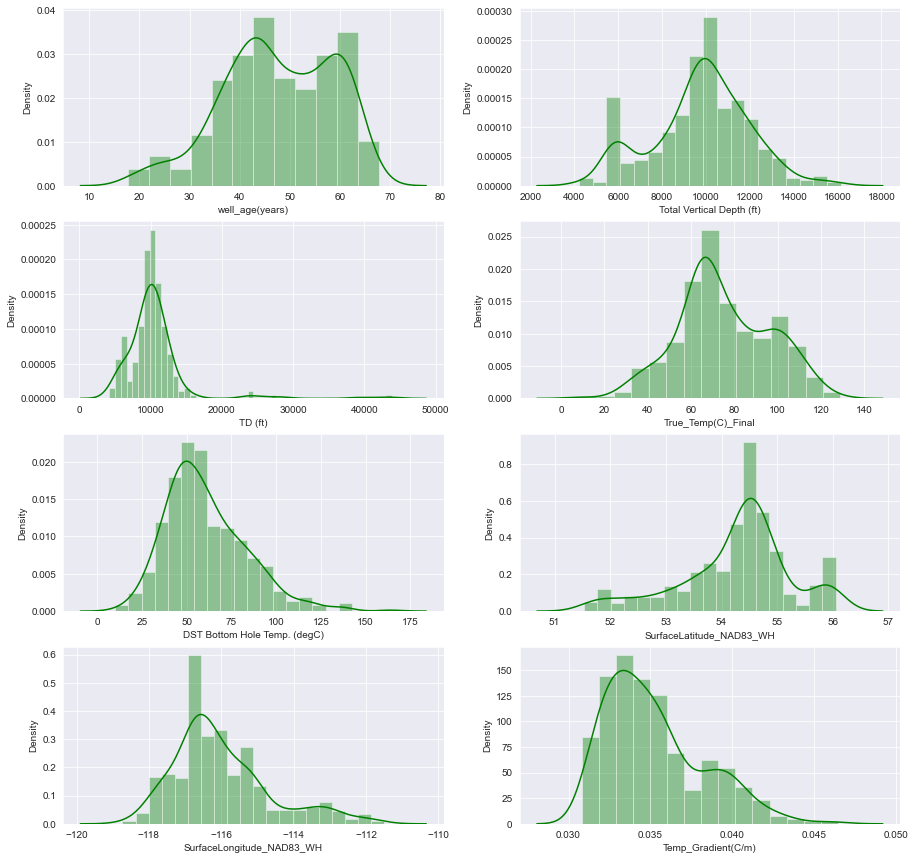

In [25]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(15, 15)

for ax, col in zip(axes, dvn_hist.columns):
  sns_plot=sns.distplot(dvn_hist[col], ax = ax, color='g')

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\U

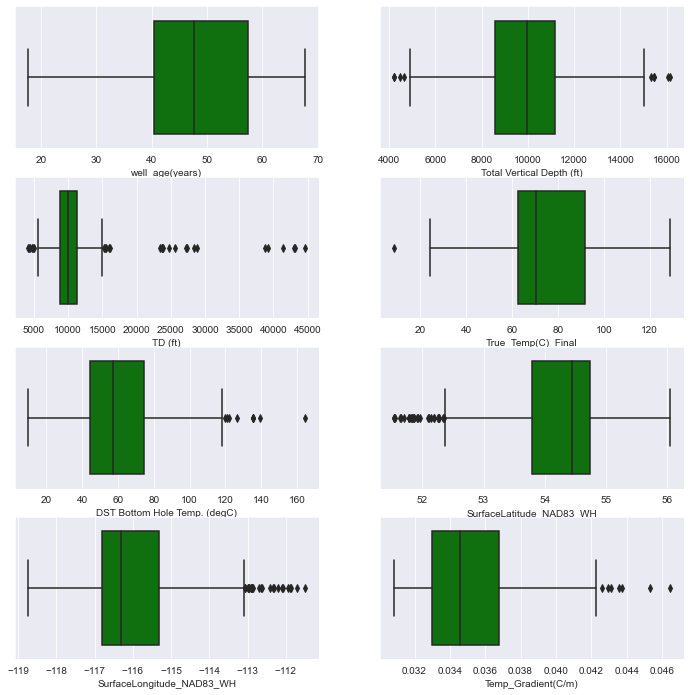

In [26]:
fig, axes = plt.subplots(nrows = 4, ncols = 2)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(12, 12)

for ax, col in zip(axes, dvn_hist.columns):
  sns.boxplot(dvn_hist[col], ax = ax, color='g')

<AxesSubplot:>

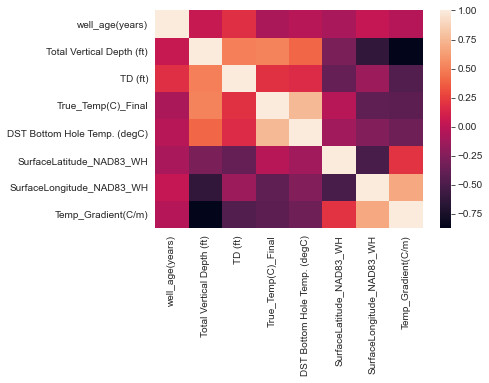

In [27]:
sns.set_style('darkgrid')
sns.heatmap(dvn_hist.corr())

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



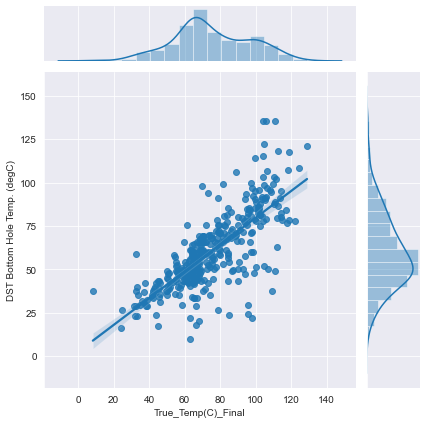

In [28]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=dvn_hist, x='True_Temp(C)_Final',                  
y='DST Bottom Hole Temp. (degC)',dropna='True')
g.plot(sns.regplot, sns.distplot)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



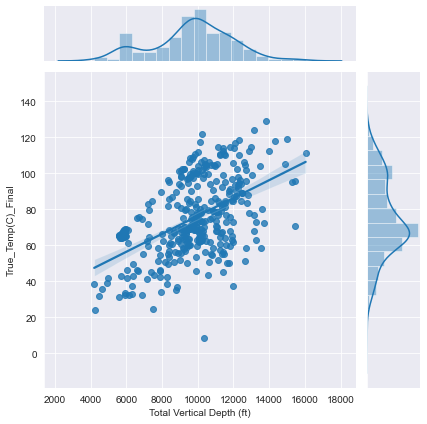

In [29]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=dvn_hist, x='Total Vertical Depth (ft)',                  
y='True_Temp(C)_Final',dropna='True')
g.plot(sns.regplot, sns.distplot)

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\ashis\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\distributions.py:1647: FutureWarning:

The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.



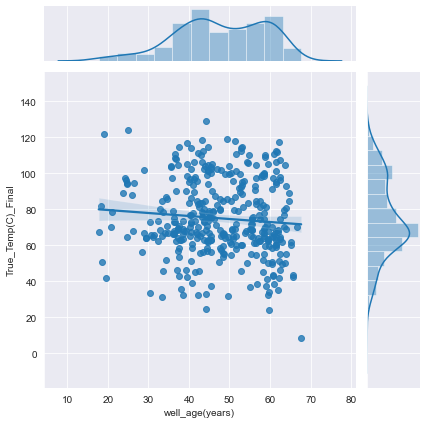

In [30]:
sns.set_style('darkgrid')
g = sns.JointGrid(data=dvn_hist, x='well_age(years)',                  
y='True_Temp(C)_Final',dropna='True')
g.plot(sns.regplot, sns.distplot)

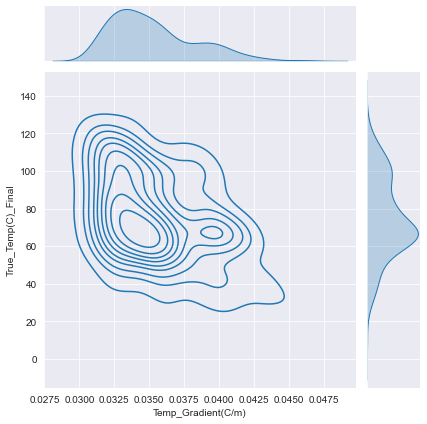

In [31]:
g = sns.JointGrid(data=dvn_hist, x="Temp_Gradient(C/m)",
y="True_Temp(C)_Final", dropna='True')
g = g.plot_joint(sns.kdeplot)
g = g.plot_marginals(sns.kdeplot, shade=True)

# SPATIAL MAPPING_DUVERNEY

In [42]:
import plotly.express as px
fig = px.density_mapbox(dvn_hist, lat='SurfaceLatitude_NAD83_WH', lon='SurfaceLongitude_NAD83_WH', z="Temp_Gradient(C/m)", radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("Temp gradient_dvn.html")


In [43]:
import plotly.express as px
fig = px.density_mapbox(dvn_hist, lat='SurfaceLatitude_NAD83_WH', lon='SurfaceLongitude_NAD83_WH', z="True_Temp(C)_Final", radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("True_Temp(C)_Final_dvn.html")

In [34]:
import plotly.express as px
fig = px.density_mapbox(dvn_hist, lat='SurfaceLatitude_NAD83_WH', lon='SurfaceLongitude_NAD83_WH', z='Total Vertical Depth (ft)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("Total Vertical Depth (ft)_dvn.html")

In [44]:
import plotly.express as px
fig = px.density_mapbox(dvn_hist, lat='SurfaceLatitude_NAD83_WH', lon='SurfaceLongitude_NAD83_WH', z='well_age(years)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("well_age(years)_dvn.html")

# SPATIAL MAPPING_EAGLEBINE

In [36]:
df_1=df[['UWI', 'SurfLat', 'SurfLong','TD (ft)','BHT_below sea level (ft)','TempC_BHT', 'True_TempC_Final','Mud Wt','Production_interval(years)', 'Oil Total Cum (bbl)   ','Total Liquid Cum(bbl)',
       'Gas Total Cum (mcf)   ', 'Water Total Cum (bbl)   ','Total Vertical Depth (ft)   ','Temp_Gradient(C/m)']]

In [37]:
import plotly.express as px
fig = px.density_mapbox(df_1, lat='SurfLat', lon='SurfLong', z="Temp_Gradient(C/m)", radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("Temp gradient_egb.html")

In [45]:

fig = px.density_mapbox(df_1, lat='SurfLat', lon='SurfLong', z='Total Vertical Depth (ft)   ', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("Total Vertical Depth (ft)_egb.html")

In [46]:

fig = px.density_mapbox(df_1, lat='SurfLat', lon='SurfLong', z='True_TempC_Final', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("True_TempC_Final_egb.html")

In [40]:

fig = px.density_mapbox(df_1, lat='SurfLat', lon='SurfLong', z='Production_interval(years)', radius=10,
                        center=dict(lat=0, lon=180), zoom=0,
                        mapbox_style="satellite-streets",height=800)

fig.show()
#fig.write_html("Production_interval(years)_egb.html")